In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns 


In [2]:
!pip install scikit-plot


In [3]:
import scikitplot as skplt

In [14]:
col_name = ['sepal-lenght','sepal-width','petal-lenght','petal-width','class']
data = pd.read_csv("/content/iris.data", names = col_name)
data

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
data.describe

<bound method NDFrame.describe of      sepal-lenght  sepal-width  petal-lenght  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [16]:
data.shape

(150, 5)

In [17]:
data.max()


sepal-lenght               7.9
sepal-width                4.4
petal-lenght               6.9
petal-width                2.5
class           Iris-virginica
dtype: object

In [18]:
data.min()

sepal-lenght            4.3
sepal-width             2.0
petal-lenght            1.0
petal-width             0.1
class           Iris-setosa
dtype: object

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-lenght  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-lenght  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
data.columns

Index(['sepal-lenght', 'sepal-width', 'petal-lenght', 'petal-width', 'class'], dtype='object')

In [51]:
A = data.corr()
A

,sepal-lenght,sepal-width,petal-lenght,petal-width
sepal-lenght,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-lenght,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


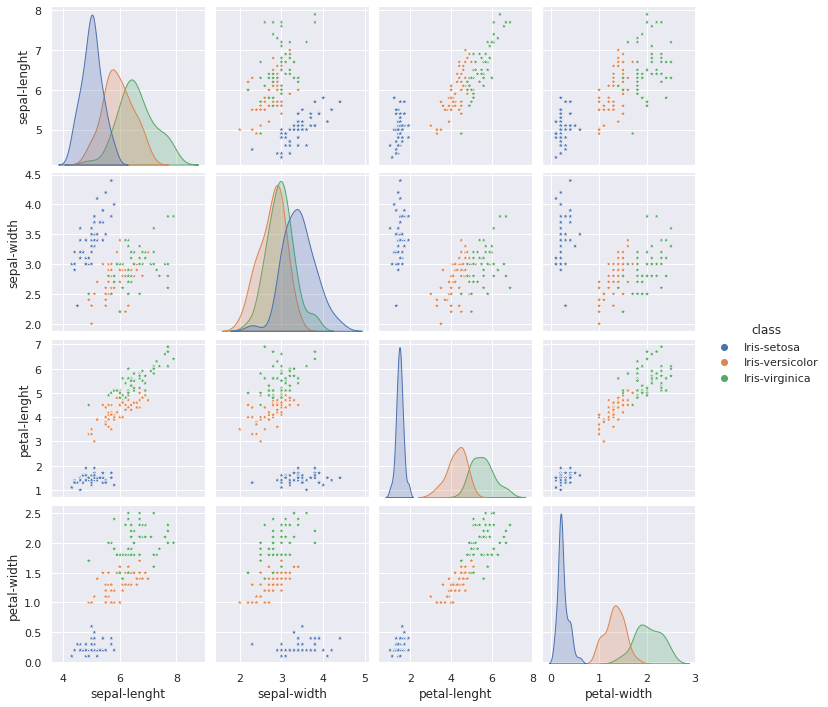

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


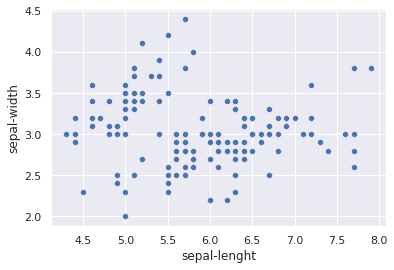

In [27]:
sns.scatterplot("sepal-lenght","sepal-width",data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


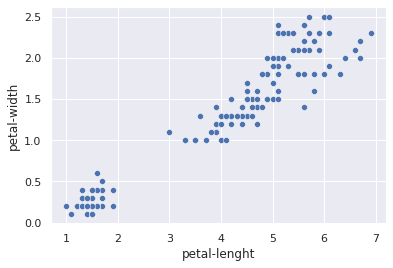

In [28]:
sns.scatterplot("petal-lenght","petal-width",data=data)

In [29]:
x = data.drop(['class'], axis=1)
y = data['class']
print("X shape", x.shape)
print("Y shape", y.shape)

X shape (150, 4)
Y shape (150,)


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [31]:
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

objects = ('D-Trees' , 'Multi-NB' , 'AdaBoost' , 'R-Forest')

In [32]:
A = DecisionTreeClassifier(random_state=42)
B = MultinomialNB(alpha=1.0,fit_prior=True)
C = AdaBoostClassifier(n_estimators=100)
D = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [33]:
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

In [34]:
clf = [A,B,C,D]
pred_val = [0,0,0,0]

for a in range(0,4):
    train_classifier(clf[a], x_train, y_train)
    y_pred = predict_labels(clf[a],x_test)
    pred_val[a] = f1_score(y_test, y_pred, average='weighted')
    print("Accuracy score of Model ",a+1," :{:0.5f} ".format(pred_val[a]))

Accuracy score of Model  1  :0.96728 
Accuracy score of Model  2  :0.46267 
Accuracy score of Model  3  :0.96728 
Accuracy score of Model  4  :0.96728 


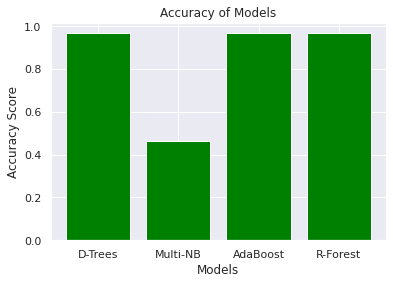

In [35]:
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, color="GREEN")
plt.xticks(y_pos, objects)

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')

plt.show()

In [36]:
from sklearn import metrics
def predict(m1_model):
    model = m1_model.fit(x_train,y_train)
    print('Training Score : {}'.format(model.score(x_train,y_train)))
    y_pred = model.predict(x_test)
    print('Predictions are : ',y_pred, '\n')
    
    print('Accuracy Score : {}'.format(metrics.accuracy_score(y_test,y_pred)))
    print('Recall         : {}'.format(metrics.recall_score(y_test,y_pred,average='macro')))
    print('Precision      : {}'.format(metrics.precision_score(y_test,y_pred,average='macro')))
    
    print("\nClassification Report : \n",metrics.classification_report(y_test,y_pred))
    print("Confusion matrix : \n",metrics.confusion_matrix(y_test,y_pred))

In [37]:
predict(DecisionTreeClassifier())

Training Score : 1.0
Predictions are :  ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica'] 

Accuracy Score : 0.9666666666666667
Recall         : 0.9743589743589745
Precision      : 0.9523809523809524

Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97  

In [38]:
predict(AdaBoostClassifier())

Training Score : 0.9583333333333334
Predictions are :  ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica'] 

Accuracy Score : 0.9666666666666667
Recall         : 0.9743589743589745
Precision      : 0.9523809523809524

Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0

In [39]:
predict(RandomForestClassifier())

Training Score : 1.0
Predictions are :  ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica'] 

Accuracy Score : 0.9666666666666667
Recall         : 0.9743589743589745
Precision      : 0.9523809523809524

Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97  

In [40]:
predict(MultinomialNB())

Training Score : 0.7166666666666667
Predictions are :  ['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica'] 

Accuracy Score : 0.5666666666666667
Recall         : 0.6666666666666666
Precision      : 0.4385964912280702

Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.32      1.00      0.48         6

       accuracy                           0.57        30
      macro avg       0.44      0.6

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 